   SIRwhiteN  SIRenvN  SIRdemN  SEIR  COVID
0       0.84     0.82     0.67  0.88   0.27
1       0.87     0.79     0.89  0.94   0.40
2       0.97     1.00     0.73  0.80   0.45
3       1.00     1.00     0.97  1.00   0.49
4       0.81     0.98     0.87  0.71   0.71


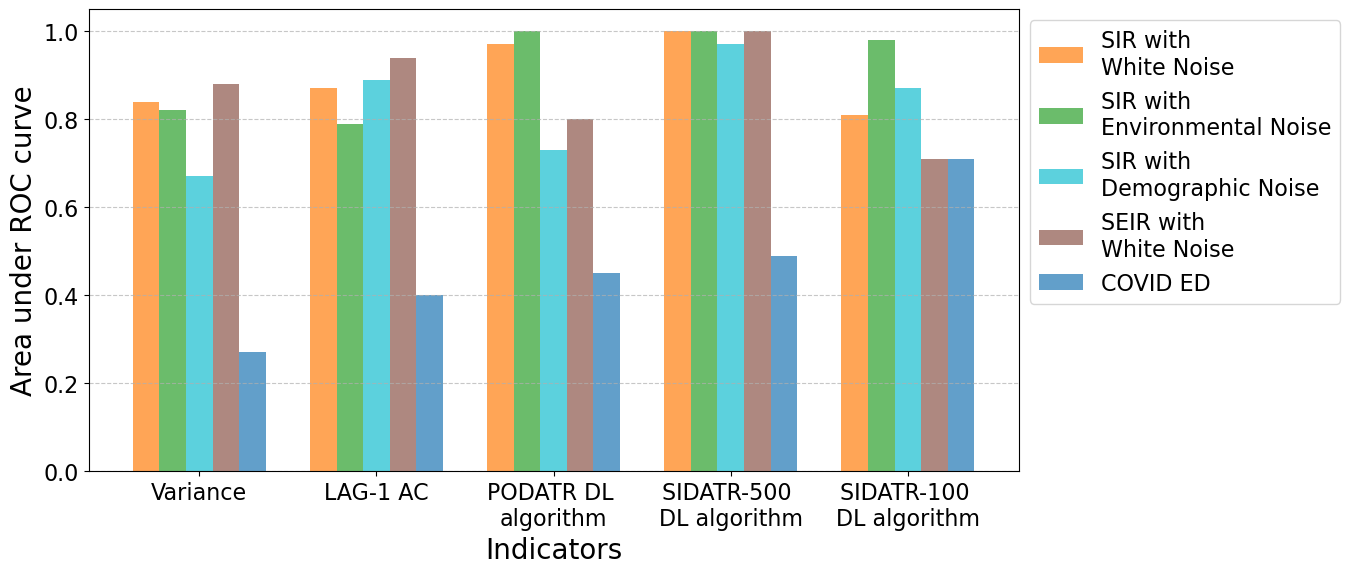

In [1]:
'''
Barplot of AUC of four different models
Shown in figure-4
Import AUC from ROC curve of different models and plot them in bar.
'''


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

combined_AUC_SIR_CL100 = pd.DataFrame()
combined_AUC_SIR_CL500 = pd.DataFrame()
combined_AUC_Bury = pd.DataFrame()

test_models = ['SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID']

for test_model in test_models: 
    AUC_SIR_CL100 = pd.read_csv(r'../data/roc/AUC_SIR_{}_CL100.csv'.format(test_model)) 
    combined_AUC_SIR_CL100 = pd.concat([combined_AUC_SIR_CL100, AUC_SIR_CL100], axis=1)

for test_model in test_models: 
    AUC_SIR_CL500 = pd.read_csv(r'../data/roc/AUC_SIR_{}_CL500.csv'.format(test_model)) 
    combined_AUC_SIR_CL500 = pd.concat([combined_AUC_SIR_CL500, AUC_SIR_CL500], axis=1)

for test_model in test_models: 
    AUC_Bury = pd.read_csv(r'../data/roc/AUC_Bury_{}.csv'.format(test_model)) 
    combined_AUC_Bury = pd.concat([combined_AUC_Bury, AUC_Bury], axis=1)

#taking only AUC by Bury model with the AUC df of SIR 
df = pd.concat([combined_AUC_SIR_CL500, combined_AUC_Bury.iloc[0].to_frame().T, combined_AUC_SIR_CL100.iloc[0].to_frame().T], axis=0, ignore_index=True)

# Switch the positions of the first and third rows
new_order = [1, 2, 3, 0, 4]
data = df.iloc[new_order]

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

print(data)



categories = ['Variance', 'LAG-1 AC', 'PODATR DL \nalgorithm', 'SIDATR-500 \nDL algorithm', 'SIDATR-100 \nDL algorithm']
columns = ['SIR with \nWhite Noise', 'SIR with \nEnvironmental Noise', 'SIR with \nDemographic Noise', 'SEIR with \nWhite Noise', 'COVID ED']
index = np.arange(len(categories))
bar_width = 0.2

ax = data.plot(kind='bar', color=['tab:orange', 'tab:green', 'tab:cyan', 'tab:brown', 'tab:blue'], alpha=0.7, width = 0.75, figsize=(12, 6), rot=0)


plt.xlabel('Indicators', fontsize=20)
plt.ylabel('Area under ROC curve', fontsize=20)
# plt.title('Combined Bar Plot')
plt.xticks(index, categories, fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=16)
ax.legend(columns, loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)

if not os.path.exists('../data/figures'):
    os.makedirs('../data/figures')

plt.savefig(r'../data/figures/AUC-compare-fig-2.png', bbox_inches = 'tight')

plt.show()
